In [ ]:
!pip install rapidfuzz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from io import StringIO
import requests
from rapidfuzz import process

url = "https://raw.githubusercontent.com/Ethan004-Code/Food_nutrition_dataset/main/cleaned_food_data.txt"
response = requests.get(url)
text_data = response.text
data = StringIO(text_data)
df = pd.read_fwf(data)

print(df.head())


                               food  Caloric  Value   Fat  Saturated Fats  \
0                      cream cheese      NaN     51   5.0             2.9   
1                 neufchatel cheese      NaN    215  19.4            10.9   
2  requeijao cremoso light catupiry      NaN     49   3.6             2.3   
3                    ricotta cheese      NaN     30   2.0             1.3   
4              cream cheese low fat      NaN     30   2.3             1.4   

   Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates  Sugars  Protein  \
0                   1.3                 0.200            0.8   0.500      0.9   
1                   4.9                 0.800            3.1   2.700      7.8   
2                   0.9                 0.000            0.9   3.400      0.8   
3                   0.5                 0.002            1.5   0.091      1.5   
4                   0.6                 0.042            1.2   0.900      1.2   

   ...  Calcium  Copper   Iron  Magnesium  Mangane

In [ ]:

low_calorie_foods = df[df['Value'] < 40]

print(low_calorie_foods)


                          food  Caloric  Value    Fat  Saturated Fats  \
3               ricotta cheese      NaN     30  2.000           1.300   
4         cream cheese low fat      NaN     30  2.300           1.400   
5        cream cheese fat free      NaN     19  0.200           0.100   
9                romano cheese      NaN     19  1.300           0.900   
10      parmesan cheese grated      NaN     21  1.400           0.800   
...                        ...      ...    ...    ...             ...   
2390                  jews ear      NaN     25  0.095           0.000   
2391           enoki mushrooms      NaN      1  0.099           0.027   
2392           morel mushrooms      NaN      4  0.070           0.056   
2393  portabella mushrooms raw      NaN     19  0.300           0.036   
2394           oyster mushroom      NaN      5  0.035           0.016   

      Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates  Sugars  \
3                    0.500                 0.002

In [ ]:
def compute_health_score(row):
    score = 0
    if row['Fat'] < 5:
        score += 2
    if row['Saturated Fats'] < 1.5:
        score += 2
    if row['Sugars'] < 5:
        score += 2
    if row['Dietary Fiber'] > 3:
        score += 2


    if 5 <= row['Protein'] <= 15:
        score += 1

    if row['Sodium'] < 140:
        score += 2
    if row['Cholesterol'] < 30:
        score += 2

    return score


In [ ]:
print(df.columns.tolist())


['food', 'Caloric', 'Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary', 'Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'Nutrition Density']


In [ ]:
print(df.columns.tolist())

['food', 'Caloric', 'Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary', 'Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'Nutrition Density']


In [ ]:
import pandas as pd
from io import StringIO
import requests
from rapidfuzz import process

# Step 1: Load data from your URL
url = "https://raw.githubusercontent.com/Ethan004-Code/Food_nutrition_dataset/main/cleaned_food_data.txt"
response = requests.get(url)
data = StringIO(response.text)

df = pd.read_fwf(data)


df = df.rename(columns={'Value': 'Calories'})
if 'Caloric' in df.columns:
    df = df.drop(columns=['Caloric'])

print("Columns after fix:", df.columns.tolist())
print(df[['food', 'Calories', 'Fat', 'Sugars']].head())


def log_food_fuzzy(food_name, df, portion_size_grams):
    food_list = df['food'].tolist()
    best_match, score, idx = process.extractOne(food_name, food_list)

    if score < 60:
        print(f"Food '{food_name}' not found with good match (best: '{best_match}', score: {score:.2f})")
        return None

    food_info = df.iloc[idx]
    scaling_factor = portion_size_grams / 100.0

    logged_calories = food_info['Calories'] * scaling_factor
    logged_fat = food_info['Fat'] * scaling_factor
    logged_saturated_fats = food_info['Saturated Fats'] * scaling_factor
    logged_sugars = food_info['Sugars'] * scaling_factor
    logged_dietary_fiber = food_info['Fiber'] * scaling_factor if 'Fiber' in df.columns else 0
    logged_protein = food_info['Protein'] * scaling_factor
    logged_sodium = food_info['Sodium'] * scaling_factor
    logged_cholesterol = food_info['Cholesterol'] * scaling_factor

    print(f"\nLogged {portion_size_grams}g of {food_info['food']}:")
    print(f"  Calories: {logged_calories:.2f}")
    print(f"  Fat: {logged_fat:.2f}g")
    print(f"  Saturated Fats: {logged_saturated_fats:.2f}g")
    print(f"  Sugars: {logged_sugars:.2f}g")
    print(f"  Dietary Fiber: {logged_dietary_fiber:.2f}g")
    print(f"  Protein: {logged_protein:.2f}g")
    print(f"  Sodium: {logged_sodium:.2f}mg")
    print(f"  Cholesterol: {logged_cholesterol:.2f}mg")

    return {
        'food_name': food_info['food'],
        'portion_size_grams': portion_size_grams,
        'calories': logged_calories,
        'fat': logged_fat,
        'saturated_fats': logged_saturated_fats,
        'sugars': logged_sugars,
        'dietary_fiber': logged_dietary_fiber,
        'protein': logged_protein,
        'sodium': logged_sodium,
        'cholesterol': logged_cholesterol
    }
log_food_fuzzy("cream cheese", df, 150)
log_food_fuzzy("apple", df, 100)
log_food_fuzzy("ice cream", df, 200)

Columns after fix: ['food', 'Calories', 'Fat', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary', 'Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'Nutrition Density']
                               food  Calories   Fat  Sugars
0                      cream cheese        51   5.0   0.500
1                 neufchatel cheese       215  19.4   2.700
2  requeijao cremoso light catupiry        49   3.6   3.400
3                    ricotta cheese        30   2.0   0.091
4              cream cheese low fat        30   2.3   0.900

Logged 150g of cream cheese:
  Calories: 76.50
  Fat: 7.50g
  Saturated Fats: 4.35g
  Sugars: 0.75g
  Dietary Fiber: 0.00g
  Protein: 1.35g
  Sodi

{'food_name': 'cream cheese low fat',
 'portion_size_grams': 200,
 'calories': np.float64(60.0),
 'fat': np.float64(4.6),
 'saturated_fats': np.float64(2.8),
 'sugars': np.float64(1.8),
 'dietary_fiber': np.float64(0.0),
 'protein': np.float64(2.4),
 'sodium': np.float64(0.092),
 'cholesterol': np.float64(16.2)}

In [ ]:
logged_entries = []

# Log multiple items
logged_entries.append(log_food_fuzzy("cream cheese", df, 150))
logged_entries.append(log_food_fuzzy("apple", df, 100))
logged_entries.append(log_food_fuzzy("ice cream", df, 200))
import pandas as pd
log_df = pd.DataFrame([entry for entry in logged_entries if entry is not None])

# View / save the results
print(log_df)
log_df.to_csv("logged_nutrition.csv", index=False)


Logged 150g of cream cheese:
  Calories: 76.50
  Fat: 7.50g
  Saturated Fats: 4.35g
  Sugars: 0.75g
  Dietary Fiber: 0.00g
  Protein: 1.35g
  Sodium: 0.02mg
  Cholesterol: 21.90mg

Logged 100g of apple:
  Calories: 95.00
  Fat: 0.30g
  Saturated Fats: 0.04g
  Sugars: 18.90g
  Dietary Fiber: 4.40g
  Protein: 0.50g
  Sodium: 0.06mg
  Cholesterol: 0.00mg

Logged 200g of cream cheese low fat:
  Calories: 60.00
  Fat: 4.60g
  Saturated Fats: 2.80g
  Sugars: 1.80g
  Dietary Fiber: 0.00g
  Protein: 2.40g
  Sodium: 0.09mg
  Cholesterol: 16.20mg
              food_name  portion_size_grams  calories  fat  saturated_fats  \
0          cream cheese                 150      76.5  7.5           4.350   
1                 apple                 100      95.0  0.3           0.043   
2  cream cheese low fat                 200      60.0  4.6           2.800   

   sugars  dietary_fiber  protein  sodium  cholesterol  
0    0.75            0.0     1.35   0.024         21.9  
1   18.90            4.4     

In [ ]:
from datetime import datetime

def log_food_with_metadata(food_name, df, portion_size_grams, meal_type):
    entry = log_food_fuzzy(food_name, df, portion_size_grams)
    if entry:
        entry['meal_type'] = meal_type
        entry['date'] = datetime.today().strftime('%Y-%m-%d')
        return entry
    return None

# Example:
logged_entries.append(log_food_with_metadata("apple", df, 100, "breakfast"))


Logged 100g of apple:
  Calories: 95.00
  Fat: 0.30g
  Saturated Fats: 0.04g
  Sugars: 18.90g
  Dietary Fiber: 4.40g
  Protein: 0.50g
  Sodium: 0.06mg
  Cholesterol: 0.00mg


In [ ]:
summary = log_df.drop(columns=['food_name', 'portion_size_grams', 'meal_type', 'date'], errors='ignore').sum()
print("Daily Totals:")
print(summary)

Daily Totals:
calories          231.500
fat                12.400
saturated_fats      7.193
sugars             21.450
dietary_fiber       4.400
protein             4.250
sodium              0.178
cholesterol        38.100
dtype: float64


*Testing phase*


In [ ]:
unique_foods = df['food'].unique().tolist()
portion_sizes = [50, 100, 150, 200, 250, 300]  # You can expand this


In [ ]:
def filter_foods(query, df):
    return df[df['food'].str.contains(query, case=False, na=False)]['food'].unique().tolist()

# Example
print(filter_foods("cheese", df))
print(filter_foods("chicken", df))


['cream cheese', 'neufchatel cheese', 'ricotta cheese', 'cream cheese low fat', 'cream cheese fat free', 'gruyere cheese', 'cheddar cheese', 'parmesan cheese', 'romano cheese', 'parmesan cheese grated', 'port salut cheese', 'swiss cheese', 'goat cheese hard', 'gouda cheese', 'pepper jack cheese lucerne', 'caraway cheese', 'gjetost cheese', 'tilsit cheese', 'goat cheese', 'brick cheese', 'asadero cheese', 'camembert cheese', 'provolone cheese reduced fat', 'roquefort cheese', 'queso blanco cheese', 'queso seco cheese', 'goat cheese soft', 'mozzarella cheese', 'chihuahua cheese', 'limburger cheese', 'muenster cheese', 'queso fresco cheese', 'brie cheese', 'pimento cheese', 'mexican cheese', 'feta cheese', 'mozzarella cheese fat free', 'provolone cheese', 'anejo cheese', 'cheese spread', 'american cheese spread', 'ham and cheese spread', 'baked potato with cheese sauce bacon', 'enchilada with cheese beef', 'biscuit with egg cheese bacon', 'bagel with ham egg cheese', 'frijoles with cheese

In [ ]:
workout_entries = []

def log_workout(activity, calories_burned, duration_minutes):
    return {
        "activity": activity,
        "calories_burned": calories_burned,
        "duration_minutes": duration_minutes,
        "date": datetime.today().strftime('%Y-%m-%d')
    }


workout_entries.append(log_workout("Running", 300, 30))


In [ ]:
def calculate_net_calories(log_df, workout_entries):
    food_calories = log_df['calories'].sum()
    workout_calories = sum(entry['calories_burned'] for entry in workout_entries)
    return food_calories - workout_calories


In [ ]:
def score_food(entry):
    # Simple example scoring: penalize high sugar and saturated fat
    score = 100
    score -= entry['sugars'] * 2
    score -= entry['saturated_fats'] * 5
    score += entry['dietary_fiber'] * 2
    return max(score, 0)
log_df['score'] = log_df.apply(score_food, axis=1)


In [ ]:
def calorie_target(goal, base_calories=2000):
    if goal == "gain":
        return base_calories + 500
    elif goal == "lose":
        return base_calories - 500
    else:  # maintain
        return base_calories

# Compare to net calories
net_cals = calculate_net_calories(log_df, workout_entries)
target = calorie_target("maintain")
print(f"Net Calories: {net_cals} / Target: {target}")


Net Calories: -68.5 / Target: 2000


In [ ]:
import json

def save_logs(log_df, workout_entries, filename='daily_log.json'):
    data = {
        'food_logs': log_df.to_dict(orient='records'),
        'workouts': workout_entries
    }
    with open(filename, 'w') as f:
        json.dump(data, f, indent=2)

def load_logs(filename='daily_log.json'):
    with open(filename, 'r') as f:
        data = json.load(f)
    return pd.DataFrame(data['food_logs']), data['workouts']


In [ ]:
def group_by_day(log_df):
    return log_df.groupby('date')['calories'].sum()

# Weekly trend
def weekly_trend(log_df):
    log_df['week'] = pd.to_datetime(log_df['date']).dt.isocalendar().week
    return log_df.groupby('week')['calories'].sum()




In [ ]:
summary = log_df.drop(columns=['food_name', 'portion_size_grams', 'meal_type', 'date'], errors='ignore').sum()
print("Daily Totals:")
print(summary)



Daily Totals:
calories          231.500
fat                12.400
saturated_fats      7.193
sugars             21.450
dietary_fiber       4.400
protein             4.250
sodium              0.178
cholesterol        38.100
score             229.935
dtype: float64


In [ ]:
from datetime import datetime

log_df['date'] = datetime.today().strftime('%Y-%m-%d')
log_df['date'] = pd.to_datetime(log_df['date'])

print(log_df)


              food_name  portion_size_grams  calories  fat  saturated_fats  \
0          cream cheese                 150      76.5  7.5           4.350   
1                 apple                 100      95.0  0.3           0.043   
2  cream cheese low fat                 200      60.0  4.6           2.800   

   sugars  dietary_fiber  protein  sodium  cholesterol   score       date  
0    0.75            0.0     1.35   0.024         21.9  76.750 2025-06-29  
1   18.90            4.4     0.50   0.062          0.0  70.785 2025-06-29  
2    1.80            0.0     2.40   0.092         16.2  82.400 2025-06-29  


In [ ]:
print(log_df.columns)
print(log_df['date'].head(10))
print(log_df['date'].isnull().sum())  # count how many null values


Index(['food_name', 'portion_size_grams', 'calories', 'fat', 'saturated_fats',
       'sugars', 'dietary_fiber', 'protein', 'sodium', 'cholesterol', 'score',
       'date'],
      dtype='object')
0   2025-06-29
1   2025-06-29
2   2025-06-29
Name: date, dtype: datetime64[ns]
0


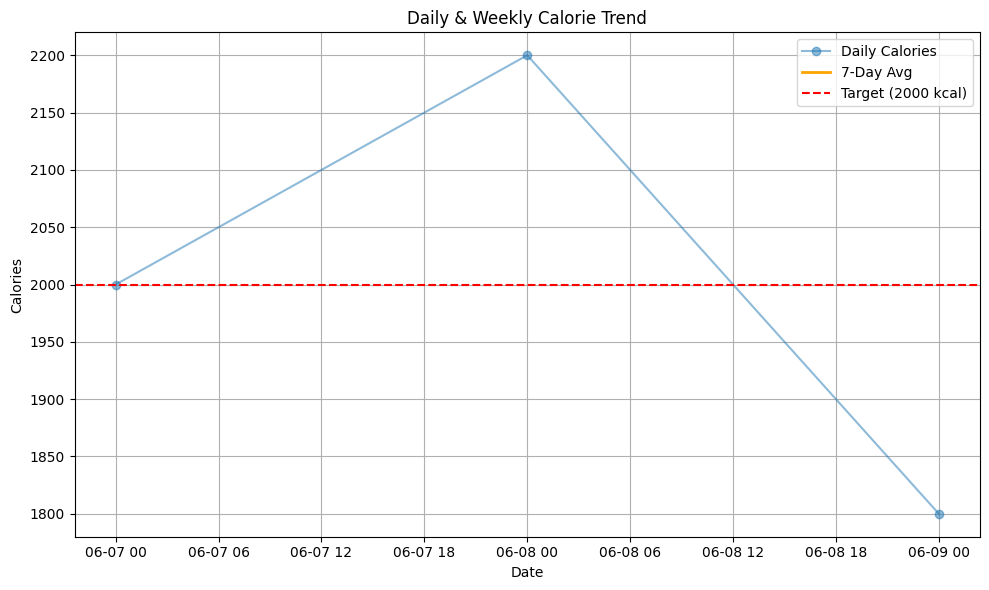

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample daily_summary
daily_summary = pd.DataFrame({
    'Date': pd.date_range(start='2025-06-07', periods=3),
    'Total Calories': [2000, 2200, 1800]
})
daily_summary.set_index('Date', inplace=True)
daily_summary['7-Day Avg'] = daily_summary['Total Calories'].rolling(7).mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_summary.index, daily_summary['Total Calories'], label='Daily Calories', alpha=0.5, marker='o')
plt.plot(daily_summary.index, daily_summary['7-Day Avg'], label='7-Day Avg', color='orange', linewidth=2)
plt.axhline(y=2000, color='red', linestyle='--', label='Target (2000 kcal)')
plt.title('Daily & Weekly Calorie Trend')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
HEALTHY_RANGES = {
    "protein": (50, 100),
    "carbs": (130, 225),
    "fiber": (25, 35),
    "sugar": (0, 25),
    "saturated_fat": (0, 20),
    "sodium": (0, 2300),
    "fat": (60, 80)
}

def evaluate_meal(meal_log):
    advice = []

    for nutrient, (min_val, max_val) in HEALTHY_RANGES.items():
        value = meal_log.get(nutrient)
        if value is None:
            continue
        if value < min_val:
            advice.append(f"⚠️ Your {nutrient} intake is low ({value}g). Try to include more sources like lean meats, beans, or seeds.")
        elif value > max_val:
            advice.append(f"⚠️ Your {nutrient} intake is high ({value}g). Consider reducing intake for better health.")
        else:
            advice.append(f"✅ {nutrient.capitalize()} is within the healthy range ({value}g). Nice job!")

    return advice


In [ ]:
# Step 1: Define nutrient targets and evaluation function
HEALTHY_RANGES = {
    "protein": (50, 100),
    "carbs": (130, 225),
    "fiber": (25, 35),
    "sugar": (0, 25),
    "saturated_fat": (0, 20),
    "sodium": (0, 2300),
    "fat": (60, 80)
}

def evaluate_meal(meal_log):
    advice = []

    for nutrient, (min_val, max_val) in HEALTHY_RANGES.items():
        value = meal_log.get(nutrient)
        if value is None:
            continue

        if value < min_val:
            advice.append(f"⚠️ {nutrient.capitalize()} is low ({value}g). Consider boosting with healthy options.")
        elif value > max_val:
            advice.append(f"⚠️ {nutrient.capitalize()} is high ({value}g). Consider reducing for better health.")
        else:
            advice.append(f"✅ {nutrient.capitalize()} is in a healthy range ({value}g). Good job!")

    return advice
test_meal = {
    "protein": 40,
    "carbs": 90,
    "fiber": 10,
    "sugar": 28,
    "saturated_fat": 15,
    "sodium": 2500,
    "fat": 70
}
feedback = evaluate_meal(test_meal)

for line in feedback:
    print(line)


⚠️ Protein is low (40g). Consider boosting with healthy options.
⚠️ Carbs is low (90g). Consider boosting with healthy options.
⚠️ Fiber is low (10g). Consider boosting with healthy options.
⚠️ Sugar is high (28g). Consider reducing for better health.
✅ Saturated_fat is in a healthy range (15g). Good job!
⚠️ Sodium is high (2500g). Consider reducing for better health.
✅ Fat is in a healthy range (70g). Good job!
